## Algerian Forest Fires Dataset 
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
read_dataset=pd.read_excel('fire updated dataset.xlsx',header=1)
# header=1 sets the starting line as second line

In [396]:
read_dataset.head()

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [397]:
read_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          213 non-null    object 
 1   month        212 non-null    float64
 2   year         212 non-null    float64
 3   Temperature  212 non-null    float64
 4   RH           212 non-null    float64
 5   Ws           212 non-null    float64
 6   Rain         212 non-null    float64
 7   FFMC         212 non-null    float64
 8   DMC          212 non-null    float64
 9   DC           212 non-null    float64
 10  ISI          212 non-null    float64
 11  BUI          212 non-null    float64
 12  FWI          212 non-null    float64
 13  Classes      212 non-null    object 
 14  Region       212 non-null    float64
dtypes: float64(13), object(2)
memory usage: 25.1+ KB


## Data cleaning

In [398]:
## missing values
d=read_dataset.isnull().value_counts()
print(d)

Day    month  year   Temperature  RH     Ws     Rain   FFMC   DMC    DC     ISI    BUI    FWI    Classes  Region
False  False  False  False        False  False  False  False  False  False  False  False  False  False    False     212
       True   True   True         True   True   True   True   True   True   True   True   True   True     True        1
Name: count, dtype: int64


In [399]:
## missing values
d=read_dataset.isnull().sum()
print(d)

Day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
Region         1
dtype: int64


In [400]:
## missing values
read_dataset[read_dataset.isnull().any(axis=1)]

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel-addes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [401]:
read_dataset.loc[:122,"Region"]=0
read_dataset.loc[122:,'Region']=1

In [402]:
read_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          213 non-null    object 
 1   month        212 non-null    float64
 2   year         212 non-null    float64
 3   Temperature  212 non-null    float64
 4   RH           212 non-null    float64
 5   Ws           212 non-null    float64
 6   Rain         212 non-null    float64
 7   FFMC         212 non-null    float64
 8   DMC          212 non-null    float64
 9   DC           212 non-null    float64
 10  ISI          212 non-null    float64
 11  BUI          212 non-null    float64
 12  FWI          212 non-null    float64
 13  Classes      212 non-null    object 
 14  Region       213 non-null    float64
dtypes: float64(13), object(2)
memory usage: 25.1+ KB


In [403]:
read_dataset[['Region']]=read_dataset[['Region']].astype(int)

In [404]:
read_dataset.head()

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [405]:
read_dataset.isnull().sum()

Day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
Region         0
dtype: int64

In [406]:
read_dataset.columns

Index(['Day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [407]:
read_dataset[['Day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']]=read_dataset[['Day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']].astype(object)

In [408]:
read_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          213 non-null    object
 1   month        212 non-null    object
 2   year         212 non-null    object
 3   Temperature  212 non-null    object
 4   RH           212 non-null    object
 5   Ws           212 non-null    object
 6   Rain         212 non-null    object
 7   FFMC         212 non-null    object
 8   DMC          212 non-null    object
 9   DC           212 non-null    object
 10  ISI          212 non-null    object
 11  BUI          212 non-null    object
 12  FWI          212 non-null    object
 13  Classes      212 non-null    object
 14  Region       213 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 24.3+ KB


In [409]:
read_dataset.isnull().sum()

Day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
Region         0
dtype: int64

In [410]:
read_dataset=read_dataset.dropna().reset_index(drop=True)


In [411]:
read_dataset.head()

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [412]:
read_dataset.isnull().sum()

Day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [413]:
## practical example of reset_index(drop=True).  
# .reset_index(drop=True) is used to set the new index from 0 onwards and delete the old index
data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30],
  "qualified": [True, False, False]
}
idx = ["X", "Y", "Z"]

df = pd.DataFrame(data,index=idx)
print(df)
newdf = df.reset_index(drop=True)

print(newdf)


    name  age  qualified
X  Sally   50       True
Y   Mary   40      False
Z   John   30      False
    name  age  qualified
0  Sally   50       True
1   Mary   40      False
2   John   30      False


In [414]:
read_dataset.columns

Index(['Day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [415]:
read_dataset.columns=read_dataset.columns.str.strip()
read_dataset.columns

Index(['Day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [416]:
read_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          212 non-null    object
 1   month        212 non-null    object
 2   year         212 non-null    object
 3   Temperature  212 non-null    object
 4   RH           212 non-null    object
 5   Ws           212 non-null    object
 6   Rain         212 non-null    object
 7   FFMC         212 non-null    object
 8   DMC          212 non-null    object
 9   DC           212 non-null    object
 10  ISI          212 non-null    object
 11  BUI          212 non-null    object
 12  FWI          212 non-null    object
 13  Classes      212 non-null    object
 14  Region       212 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 24.1+ KB


#### Changes the required columns as integer data type

In [417]:
read_dataset[['Day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=read_dataset[['Day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [418]:
read_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          212 non-null    int32 
 1   month        212 non-null    int32 
 2   year         212 non-null    int32 
 3   Temperature  212 non-null    int32 
 4   RH           212 non-null    int32 
 5   Ws           212 non-null    int32 
 6   Rain         212 non-null    object
 7   FFMC         212 non-null    object
 8   DMC          212 non-null    object
 9   DC           212 non-null    object
 10  ISI          212 non-null    object
 11  BUI          212 non-null    object
 12  FWI          212 non-null    object
 13  Classes      212 non-null    object
 14  Region       212 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 19.2+ KB


In [419]:
read_dataset.head()

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#### Changing the other columns to float data datatype


In [420]:
objects=[features for features in read_dataset.columns if read_dataset[features].dtype=='O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [421]:
for i in objects:
    if i!='Classes':
        read_dataset[i]=read_dataset[i].astype(float)

In [422]:
read_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          212 non-null    int32  
 1   month        212 non-null    int32  
 2   year         212 non-null    int32  
 3   Temperature  212 non-null    int32  
 4   RH           212 non-null    int32  
 5   Ws           212 non-null    int32  
 6   Rain         212 non-null    float64
 7   FFMC         212 non-null    float64
 8   DMC          212 non-null    float64
 9   DC           212 non-null    float64
 10  ISI          212 non-null    float64
 11  BUI          212 non-null    float64
 12  FWI          212 non-null    float64
 13  Classes      212 non-null    object 
 14  Region       212 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 19.2+ KB


In [423]:
read_dataset.describe()

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,212.000000,212.000000,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,15.726415,7.287736,2012.0,32.443396,61.943396,15.589623,0.782547,77.934906,15.025472,50.223585,4.801415,17.038208,7.175472,0.424528
std,8.826965,1.029075,0.0,3.620846,14.603661,2.635249,2.063799,14.285890,12.789770,48.810059,4.180234,14.620290,7.523792,0.495441
min,1.000000,6.000000,2012.0,22.000000,21.000000,9.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,6.000000,2012.0,30.000000,52.750000,14.000000,0.000000,72.075000,6.000000,10.350000,1.400000,6.175000,0.800000,0.000000
50%,16.000000,7.000000,2012.0,33.000000,63.000000,15.000000,0.000000,83.750000,11.300000,33.600000,3.750000,12.550000,5.050000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.525000,88.225000,20.750000,71.075000,7.300000,22.525000,11.675000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,26.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [424]:
read_dataset.head()

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [425]:
## Lets save the cleaned dataset
## index=False instructs the file to not save the index.
read_dataset.to_csv('Algerian_forest_fires.csv',index=False)

##  Exploratory Data Analysis

In [426]:
read_dataset_copy=read_dataset.drop(['Day','month','year'],axis=1)

In [427]:
read_dataset_copy["Classes"].value_counts()

Classes
fire             114
not fire          88
fire               4
fire               2
not fire           2
not fire           1
not fire           1
Name: count, dtype: int64

In [428]:
read_dataset_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
207,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,fire,1
208,36,54,14,0.0,91.0,65.9,177.3,10.0,68.0,26.1,fire,1
209,35,56,14,0.4,79.2,37.0,166.0,2.1,30.6,6.1,not fire,1
210,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,fire,1


In [429]:
read_dataset

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,26,8,2012,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,fire,1
208,27,8,2012,36,54,14,0.0,91.0,65.9,177.3,10.0,68.0,26.1,fire,1
209,28,8,2012,35,56,14,0.4,79.2,37.0,166.0,2.1,30.6,6.1,not fire,1
210,29,8,2012,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,fire,1


In [430]:
## encoding of the categories in classes
read_dataset_copy['Classes']=np.where(read_dataset_copy["Classes"].str.contains('not fire'),0,1)

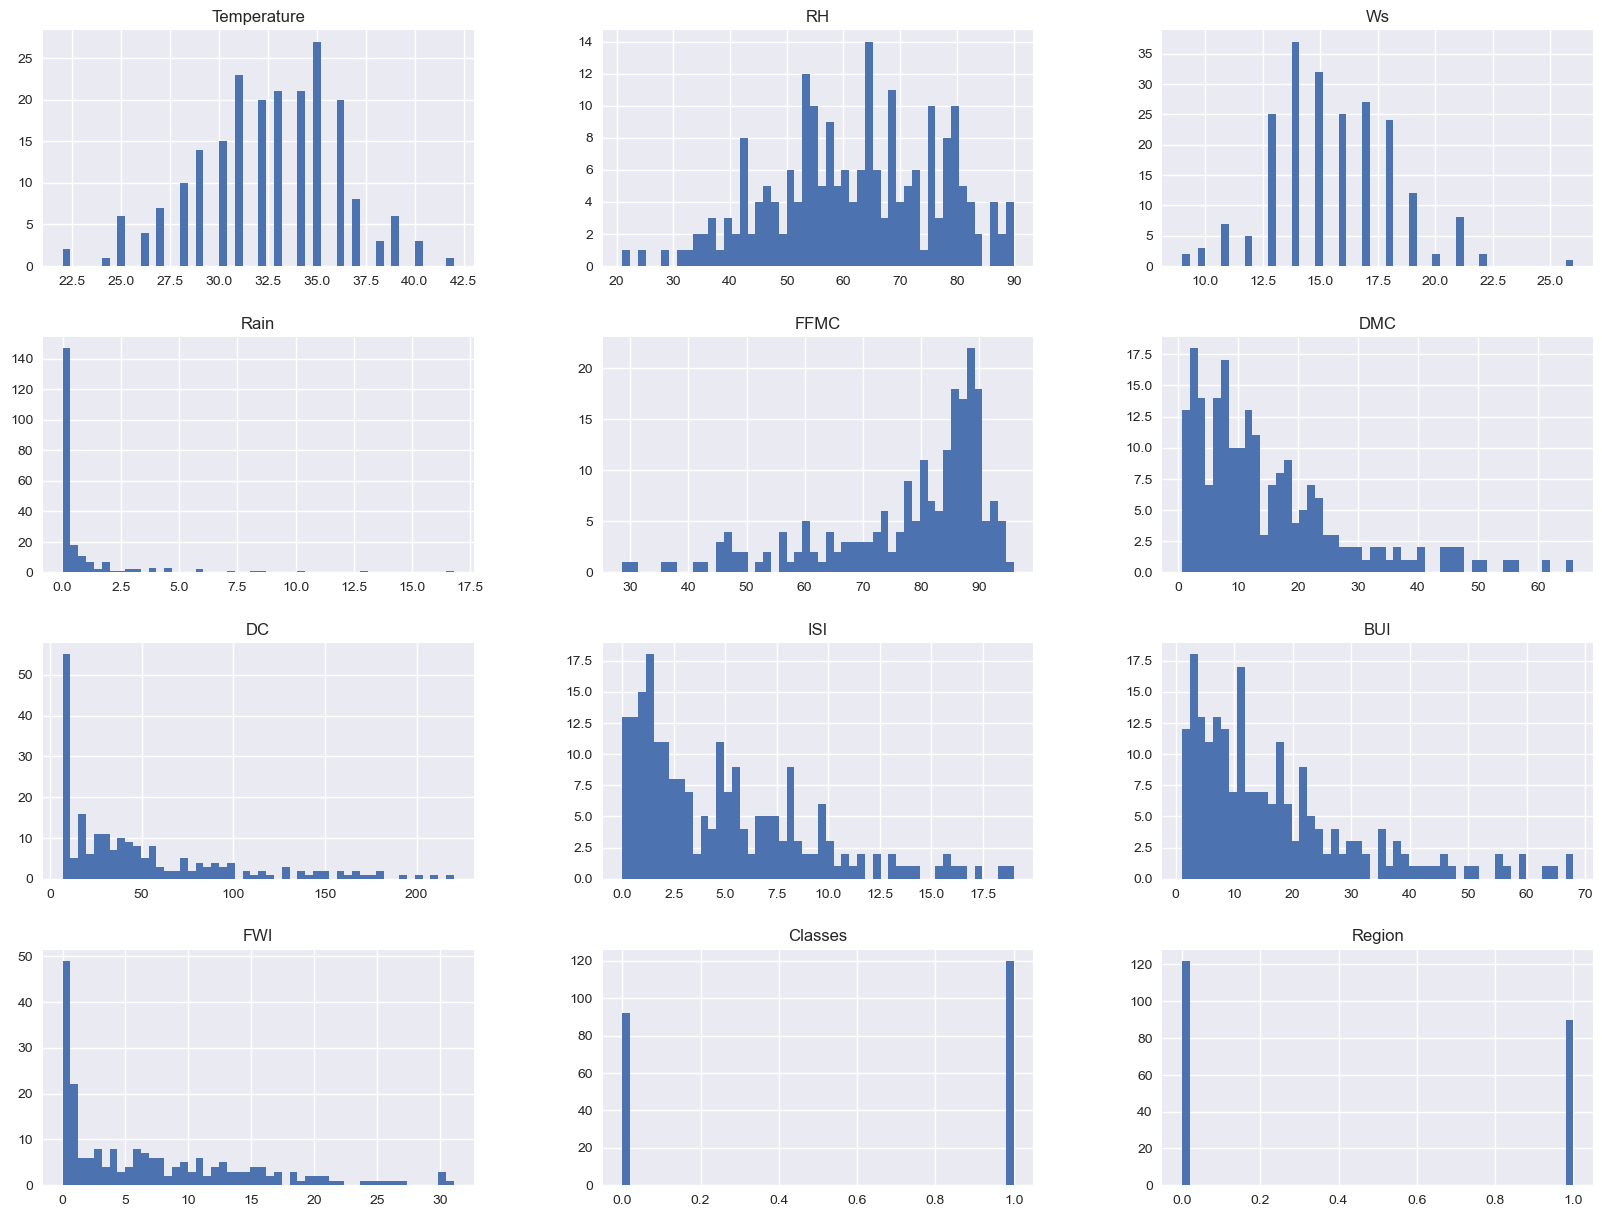

In [432]:
## Plot density plot for all features
plt.style.use('seaborn-v0_8')
read_dataset_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [433]:
read_dataset

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,26,8,2012,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,fire,1
208,27,8,2012,36,54,14,0.0,91.0,65.9,177.3,10.0,68.0,26.1,fire,1
209,28,8,2012,35,56,14,0.4,79.2,37.0,166.0,2.1,30.6,6.1,not fire,1
210,29,8,2012,35,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,fire,1


In [434]:
## percentage for pie chart
percentage=read_dataset_copy["Classes"].value_counts(normalize=True)*100

In [435]:
## The value_counts() method in pandas is used to get the count of unique values in a Series. 
## When normalize=True is passed as an argument to this method,
## it returns the relative frequencies or proportions of each unique value instead of the raw counts. 
## This means that the sum of all values in the resulting series will be equal to 1.

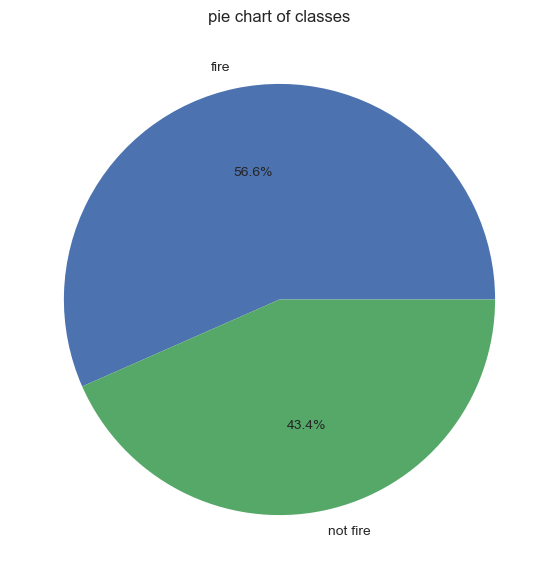

In [436]:
##plotting piechart
classlabels=['fire','not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('pie chart of classes')
plt.show()

In [437]:
## Correlation

In [438]:
read_dataset_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.698266,-0.332497,-0.372071,0.718090,0.471992,0.361636,0.610756,0.445198,0.561084,0.534298,0.407101
RH,-0.698266,1.000000,0.218970,0.230998,-0.654663,-0.385640,-0.193313,-0.686086,-0.326643,-0.568427,-0.446960,-0.482043
Ws,-0.332497,0.218970,1.000000,0.225072,-0.156425,0.035001,0.111836,0.012529,0.068372,0.045169,-0.057034,-0.181739
Rain,-0.372071,0.230998,0.225072,1.000000,-0.551782,-0.289764,-0.296221,-0.347588,-0.300053,-0.325023,-0.373985,-0.033972
FFMC,0.718090,-0.654663,-0.156425,-0.551782,1.000000,0.604217,0.499114,0.741189,0.590381,0.692435,0.772899,0.266475
DMC,0.471992,-0.385640,0.035001,-0.289764,0.604217,1.000000,0.873707,0.676161,0.982065,0.878923,0.587725,0.247347
DC,0.361636,-0.193313,0.111836,-0.296221,0.499114,0.873707,1.000000,0.491945,0.940163,0.732496,0.508943,-0.070225
ISI,0.610756,-0.686086,0.012529,-0.347588,0.741189,0.676161,0.491945,1.000000,0.636503,0.917536,0.737884,0.319851
BUI,0.445198,-0.326643,0.068372,-0.300053,0.590381,0.982065,0.940163,0.636503,1.000000,0.858764,0.588573,0.128673
FWI,0.561084,-0.568427,0.045169,-0.325023,0.692435,0.878923,0.732496,0.917536,0.858764,1.000000,0.723172,0.247809


<Axes: >

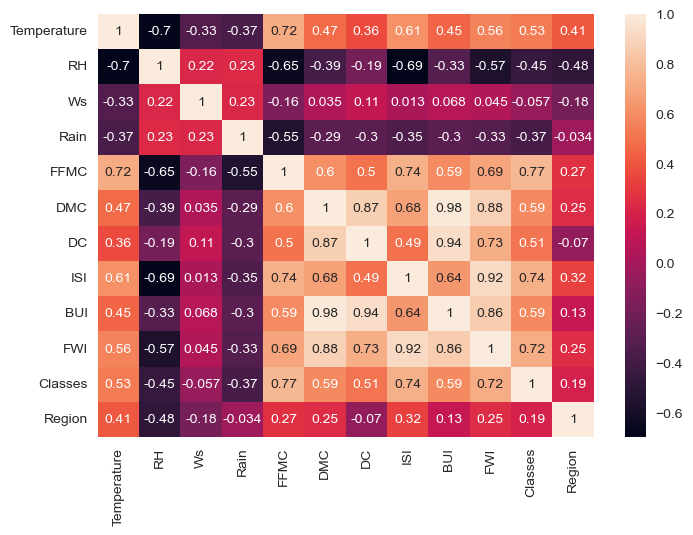

In [442]:
sns.heatmap(read_dataset_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

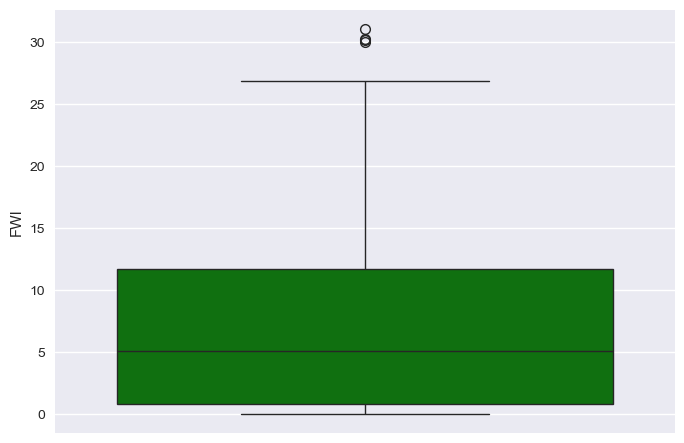

In [440]:
## box plot
sns.boxplot(read_dataset['FWI'],color='green')

In [441]:
read_dataset.head()

,Day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [443]:
read_dataset['Classes']=np.where(read_dataset['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

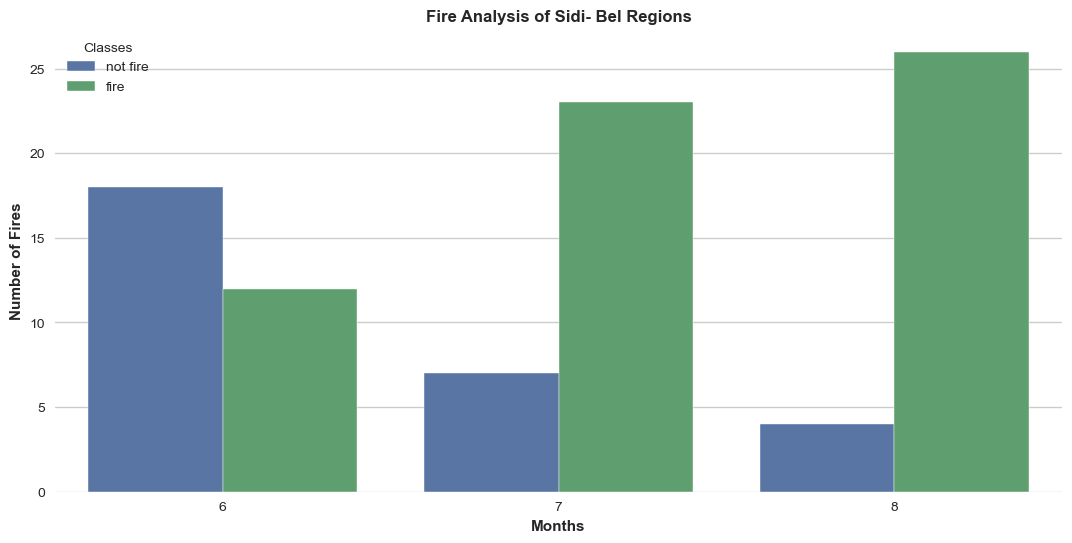

In [450]:
## monthly fire analysis
read_dataset_temp=read_dataset.loc[read_dataset['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=read_dataset_temp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of brjaia Regions')

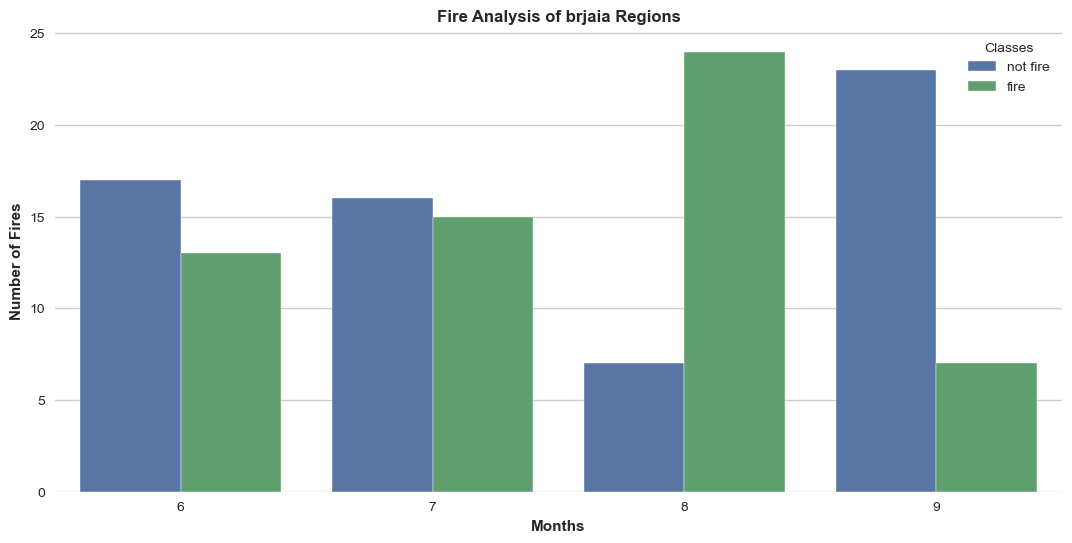

In [451]:
## monthly fire analysis
read_dataset_temp=read_dataset.loc[read_dataset['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=read_dataset_temp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of brjaia Regions",weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September